<a href="https://colab.research.google.com/github/bhanuprasadtudy/advancedadvertisingstatistics/blob/master/Cleaning_Up_AdTime_Series_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
csv_file = '/content/drive/My Drive/Colab Notebooks/mercedesbenz.adspend.csv'       
df = pd.read_csv(csv_file)
df.head()

,TIME PERIOD,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),SYNDICATION DOLS (000),SPOT TV DOLS (000),MAGAZINES DOLS (000),SUNDAY MAGS DOLS (000),NATL NEWSP DOLS (000),NEWSPAPER DOLS (000),NETWORK RADIO DOLS (000),NAT SPOT RADIO DOLS (000),OUTDOOR DOLS (000)
0,"WEEK OF OCT 07, 2013 (B)",Mercedes Benz CLA : European Passenger Auto,4464.1,887.6,1161.2,0.0,2129.0,286.4,0.0,0.0,0.0,0.0,0.0,0.0
1,"WEEK OF OCT 07, 2013 (B)",Mercedes Benz CLA250 : European Passenger Auto,1196.5,426.2,770.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"WEEK OF OCT 07, 2013 (B)",Mercedes Benz CLA250 Leasing : European Passen...,0.1,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"WEEK OF OCT 07, 2013 (B)",Mercedes Benz Full Line : Various European Aut...,30.2,0.0,0.0,0.0,1.1,0.0,0.0,0.0,0.0,28.8,0.2,0.0
4,"WEEK OF OCT 07, 2013 (B)",Mercedes Benz Full Line Pre-Owned : Various Eu...,37.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.1,0.0,0.0


In [7]:
df["TIME PERIOD"]= df["TIME PERIOD"].str.replace("WEEK OF", "", case = False)
df.head()  

,TIME PERIOD,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),SYNDICATION DOLS (000),SPOT TV DOLS (000),MAGAZINES DOLS (000),SUNDAY MAGS DOLS (000),NATL NEWSP DOLS (000),NEWSPAPER DOLS (000),NETWORK RADIO DOLS (000),NAT SPOT RADIO DOLS (000),OUTDOOR DOLS (000)
0,"OCT 07, 2013 (B)",Mercedes Benz CLA : European Passenger Auto,4464.1,887.6,1161.2,0.0,2129.0,286.4,0.0,0.0,0.0,0.0,0.0,0.0
1,"OCT 07, 2013 (B)",Mercedes Benz CLA250 : European Passenger Auto,1196.5,426.2,770.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"OCT 07, 2013 (B)",Mercedes Benz CLA250 Leasing : European Passen...,0.1,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"OCT 07, 2013 (B)",Mercedes Benz Full Line : Various European Aut...,30.2,0.0,0.0,0.0,1.1,0.0,0.0,0.0,0.0,28.8,0.2,0.0
4,"OCT 07, 2013 (B)",Mercedes Benz Full Line Pre-Owned : Various Eu...,37.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.1,0.0,0.0


# Cleaning


In [8]:
df["TIME PERIOD"]= df["TIME PERIOD"].str.replace("(B)", "", case = False)
df['TIME PERIOD'] = df['TIME PERIOD'].str.replace(r"\(.*\)","")  
df['TIME PERIOD'] = df['TIME PERIOD'].str.replace(r",","")  
df.head()   

,TIME PERIOD,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),SYNDICATION DOLS (000),SPOT TV DOLS (000),MAGAZINES DOLS (000),SUNDAY MAGS DOLS (000),NATL NEWSP DOLS (000),NEWSPAPER DOLS (000),NETWORK RADIO DOLS (000),NAT SPOT RADIO DOLS (000),OUTDOOR DOLS (000)
0,OCT 07 2013,Mercedes Benz CLA : European Passenger Auto,4464.1,887.6,1161.2,0.0,2129.0,286.4,0.0,0.0,0.0,0.0,0.0,0.0
1,OCT 07 2013,Mercedes Benz CLA250 : European Passenger Auto,1196.5,426.2,770.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,OCT 07 2013,Mercedes Benz CLA250 Leasing : European Passen...,0.1,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,OCT 07 2013,Mercedes Benz Full Line : Various European Aut...,30.2,0.0,0.0,0.0,1.1,0.0,0.0,0.0,0.0,28.8,0.2,0.0
4,OCT 07 2013,Mercedes Benz Full Line Pre-Owned : Various Eu...,37.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.1,0.0,0.0


#Cleaning column names


In [0]:
df['TOTAL DOLS (000)'] = df['TOTAL DOLS (000)'] * 1000
df['NETWORK TV DOLS (000)'] = df['NETWORK TV DOLS (000)'] * 1000
df['CABLE TV DOLS (000)'] = df['CABLE TV DOLS (000)'] * 1000
df['SYNDICATION DOLS (000)'] = df['SYNDICATION DOLS (000)'] * 1000
df['SPOT TV DOLS (000)'] = df['SPOT TV DOLS (000)'] * 1000
df['MAGAZINES DOLS (000)'] = df['MAGAZINES DOLS (000)'] * 1000
df['SUNDAY MAGS DOLS (000)'] = df['SPOT TV DOLS (000)'] * 1000
df['NATL NEWSP DOLS (000)'] = df['NATL NEWSP DOLS (000)'] * 1000
df['NEWSPAPER DOLS (000)'] = df['NEWSPAPER DOLS (000)'] * 1000
df['NETWORK RADIO DOLS (000)'] = df['NETWORK RADIO DOLS (000)'] * 1000
df['NAT SPOT RADIO DOLS (000)'] = df['NAT SPOT RADIO DOLS (000)'] * 1000
df['OUTDOOR DOLS (000)'] = df['OUTDOOR DOLS (000)'] * 1000

In [10]:
df.head()

,TIME PERIOD,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),SYNDICATION DOLS (000),SPOT TV DOLS (000),MAGAZINES DOLS (000),SUNDAY MAGS DOLS (000),NATL NEWSP DOLS (000),NEWSPAPER DOLS (000),NETWORK RADIO DOLS (000),NAT SPOT RADIO DOLS (000),OUTDOOR DOLS (000)
0,OCT 07 2013,Mercedes Benz CLA : European Passenger Auto,4464100.0,887600.0,1161200.0,0.0,2129000.0,286400.0,2.129000e+09,0.0,0.0,0.0,0.0,0.0
1,OCT 07 2013,Mercedes Benz CLA250 : European Passenger Auto,1196500.0,426200.0,770300.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2,OCT 07 2013,Mercedes Benz CLA250 Leasing : European Passen...,100.0,0.0,0.0,0.0,100.0,0.0,1.000000e+05,0.0,0.0,0.0,0.0,0.0
3,OCT 07 2013,Mercedes Benz Full Line : Various European Aut...,30200.0,0.0,0.0,0.0,1100.0,0.0,1.100000e+06,0.0,0.0,28800.0,200.0,0.0
4,OCT 07 2013,Mercedes Benz Full Line Pre-Owned : Various Eu...,37100.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,37100.0,0.0,0.0


In [0]:
df.columns = df.columns.str.replace("(000)", "")

In [0]:
df.columns = df.columns.str.replace(r"\(.*\)","")  

In [13]:
df.head()

,TIME PERIOD,PRODUCT,TOTAL DOLS,NETWORK TV DOLS,CABLE TV DOLS,SYNDICATION DOLS,SPOT TV DOLS,MAGAZINES DOLS,SUNDAY MAGS DOLS,NATL NEWSP DOLS,NEWSPAPER DOLS,NETWORK RADIO DOLS,NAT SPOT RADIO DOLS,OUTDOOR DOLS
0,OCT 07 2013,Mercedes Benz CLA : European Passenger Auto,4464100.0,887600.0,1161200.0,0.0,2129000.0,286400.0,2.129000e+09,0.0,0.0,0.0,0.0,0.0
1,OCT 07 2013,Mercedes Benz CLA250 : European Passenger Auto,1196500.0,426200.0,770300.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2,OCT 07 2013,Mercedes Benz CLA250 Leasing : European Passen...,100.0,0.0,0.0,0.0,100.0,0.0,1.000000e+05,0.0,0.0,0.0,0.0,0.0
3,OCT 07 2013,Mercedes Benz Full Line : Various European Aut...,30200.0,0.0,0.0,0.0,1100.0,0.0,1.100000e+06,0.0,0.0,28800.0,200.0,0.0
4,OCT 07 2013,Mercedes Benz Full Line Pre-Owned : Various Eu...,37100.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,37100.0,0.0,0.0


In [14]:
df.columns

Index(['TIME PERIOD', 'PRODUCT', 'TOTAL DOLS ', 'NETWORK TV DOLS ',
       'CABLE TV DOLS ', 'SYNDICATION DOLS ', 'SPOT TV DOLS ',
       'MAGAZINES DOLS ', 'SUNDAY MAGS DOLS ', 'NATL NEWSP DOLS ',
       'NEWSPAPER DOLS ', 'NETWORK RADIO DOLS ', 'NAT SPOT RADIO DOLS ',
       'OUTDOOR DOLS '],
      dtype='object')

In [0]:
from datetime import datetime

In [16]:
df['TIME PERIOD']

0        OCT 07 2013 
1        OCT 07 2013 
2        OCT 07 2013 
3        OCT 07 2013 
4        OCT 07 2013 
            ...      
3451     OCT 01 2018 
3452     OCT 01 2018 
3453     OCT 01 2018 
3454     OCT 01 2018 
3455     OCT 01 2018 
Name: TIME PERIOD, Length: 3456, dtype: object

#Pivoting data by week 

In [22]:
len(df['TIME PERIOD'].unique()) 

261

In [23]:
table = pd.pivot_table(df, index='TIME PERIOD', aggfunc=sum) 
table

,CABLE TV DOLS,MAGAZINES DOLS,NAT SPOT RADIO DOLS,NATL NEWSP DOLS,NETWORK RADIO DOLS,NETWORK TV DOLS,NEWSPAPER DOLS,OUTDOOR DOLS,SPOT TV DOLS,SUNDAY MAGS DOLS,SYNDICATION DOLS,TOTAL DOLS
TIME PERIOD,,,,,,,,,,,,
APR 02 2018,1888500.0,0.0,1400.0,0.0,50400.0,7785900.0,0.0,0.0,23500.0,2.350000e+07,0.0,9749700.0
APR 03 2017,1550900.0,0.0,1700.0,0.0,0.0,7733100.0,5600.0,0.0,62000.0,6.200000e+07,0.0,9353400.0
APR 04 2016,2338800.0,47300.0,1900.0,0.0,13400.0,7903600.0,0.0,0.0,27400.0,2.740000e+07,0.0,10332600.0
APR 06 2015,2211000.0,0.0,2400.0,142900.0,0.0,9008900.0,0.0,0.0,70000.0,7.000000e+07,0.0,11435200.0
APR 07 2014,2714600.0,133600.0,0.0,1117300.0,0.0,10351300.0,0.0,0.0,0.0,0.000000e+00,0.0,14316800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
SEP 24 2018,1289500.0,0.0,300.0,0.0,63700.0,8292200.0,0.0,0.0,179400.0,1.794000e+08,0.0,9825100.0
SEP 25 2017,1556800.0,2755200.0,34200.0,0.0,8100.0,6051200.0,68200.0,54800.0,2176000.0,2.176000e+09,0.0,12704300.0
SEP 26 2016,2684700.0,2298600.0,27200.0,0.0,52700.0,8572800.0,0.0,42200.0,1488000.0,1.488000e+09,5400.0,15171700.0


In [24]:
table.index

Index([' APR 02 2018 ', ' APR 03 2017 ', ' APR 04 2016 ', ' APR 06 2015 ',
       ' APR 07 2014 ', ' APR 09 2018 ', ' APR 10 2017 ', ' APR 11 2016 ',
       ' APR 13 2015 ', ' APR 14 2014 ',
       ...
       ' SEP 17 2018 ', ' SEP 18 2017 ', ' SEP 19 2016 ', ' SEP 21 2015 ',
       ' SEP 22 2014 ', ' SEP 24 2018 ', ' SEP 25 2017 ', ' SEP 26 2016 ',
       ' SEP 28 2015 ', ' SEP 29 2014 '],
      dtype='object', name='TIME PERIOD', length=261)

In [25]:
table['TOTAL DOLS '].mean()   

5347106.513409962

#Graphs of different ad spends in subplots 


In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = table.index
y = table['CABLE TV DOLS ']

Text(0.5, 1.0, 'Chronological ad spend for cable TV')

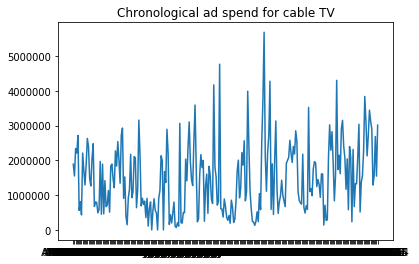

In [27]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Chronological ad spend for cable TV')